# Самостоятельная. Модуль 3

In [1]:
import numpy as np
import pandas as pd
import torch

## Задача 1

### 1

In [18]:
a = torch.eye(3, 4)
b = torch.zeros(12,)
print(a)
print(b)

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


### 2

In [19]:
c = b.view(2, 2, 3)
c

tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])

### 3

In [20]:
a[:, 0]

tensor([1., 0., 0.])

## Задача 2

### 1

In [46]:
a = torch.zeros(5, 2)
b = torch.zeros(1, 10)
print(a)
print(b)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])


### 2

In [47]:
c = b.view(5, 2)
c

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])

### 3

In [48]:
a = (a + 2) * 3 - 1/2
a

tensor([[5.5000, 5.5000],
        [5.5000, 5.5000],
        [5.5000, 5.5000],
        [5.5000, 5.5000],
        [5.5000, 5.5000]])

In [49]:
c += 2
a @ c.T

tensor([[22., 22., 22., 22., 22.],
        [22., 22., 22., 22., 22.],
        [22., 22., 22., 22., 22.],
        [22., 22., 22., 22., 22.],
        [22., 22., 22., 22., 22.]])

In [50]:
a - c

tensor([[3.5000, 3.5000],
        [3.5000, 3.5000],
        [3.5000, 3.5000],
        [3.5000, 3.5000],
        [3.5000, 3.5000]])

In [51]:
a + c

tensor([[7.5000, 7.5000],
        [7.5000, 7.5000],
        [7.5000, 7.5000],
        [7.5000, 7.5000],
        [7.5000, 7.5000]])

In [52]:
a * c

tensor([[11., 11.],
        [11., 11.],
        [11., 11.],
        [11., 11.],
        [11., 11.]])

In [53]:
c / a

tensor([[0.3636, 0.3636],
        [0.3636, 0.3636],
        [0.3636, 0.3636],
        [0.3636, 0.3636],
        [0.3636, 0.3636]])

In [54]:
c > a

tensor([[False, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False]])

## Задача 3

### 1

In [93]:
images = torch.zeros(100, 200, 200, 3)

### 2

In [94]:
import matplotlib.pyplot as plt

In [95]:
for image_i in range(100):
    images[image_i, image_i*2:image_i*2+2] += 255

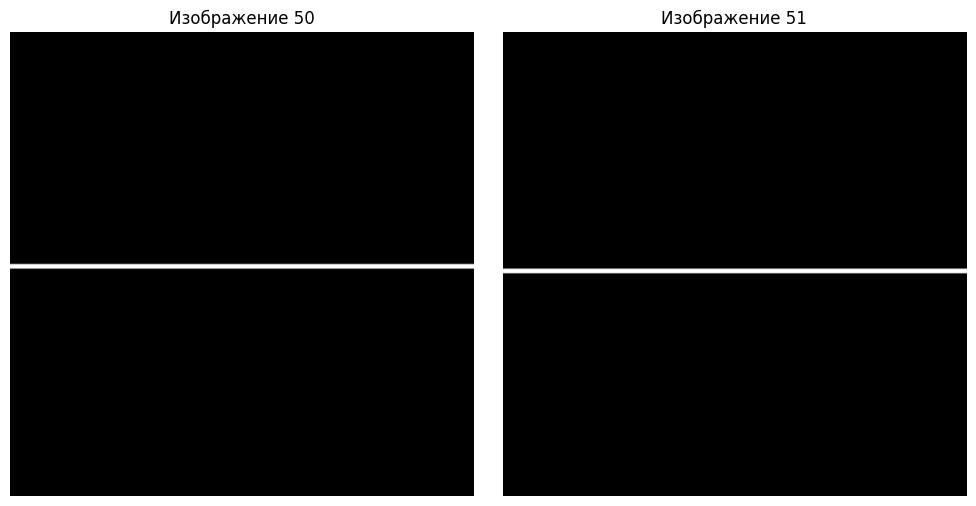

In [96]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(images[50].int())
ax1.set_title('Изображение 50')
ax1.axis('off')

ax2.imshow(images[51].int())
ax2.set_title('Изображение 51')
ax2.axis('off')

plt.tight_layout()
plt.show()

### 3

(-0.5, 199.5, 199.5, -0.5)

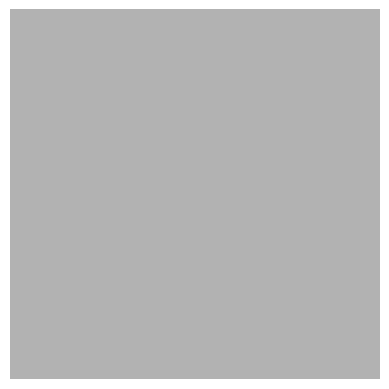

In [97]:
plt.imshow((images.mean(dim=0) * 70).int())
plt.axis('off')

## Задача 4

### 1

In [102]:
def forward(X, w):
    bias = w[0]
    weights = w[1:]
    return torch.sigmoid(X @ weights.T + bias)
    
X = torch.tensor([
    [1, 2],
    [3, 4]
], dtype=torch.float)
w = torch.tensor([1, 0.5, 0.8])

forward(X, w)

tensor([0.9569, 0.9967])

## Задача 5

In [109]:
a = torch.empty(2, 3, 4).uniform_()
b = torch.empty(1, 8, 3).uniform_()

In [110]:
c = b.view(2, 3, 4)

In [111]:
from torch.autograd import Variable

a, b, c = Variable(a, requires_grad=False), Variable(b, requires_grad=False), Variable(c, requires_grad=True)

In [112]:
L = torch.mean((c - a)**2)
L.backward()
print(c.grad)

tensor([[[-0.0031, -0.0175, -0.0293, -0.0175],
         [ 0.0585, -0.0575,  0.0081, -0.0131],
         [-0.0215,  0.0305,  0.0511, -0.0238]],

        [[-0.0096, -0.0129, -0.0125, -0.0538],
         [-0.0490, -0.0288, -0.0253, -0.0012],
         [-0.0170,  0.0129,  0.0461, -0.0048]]])
